In [0]:
pip install apyori

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Python interpreter will be restarted.
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=0e342af724a6b3bc3dfef5fe1282f74302895e5f4f74b501dabd6325271fdebe
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori
Python interpreter will be restarted.


In [0]:
from apyori import apriori 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [0]:
df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/sanjaybhargav337@gmail.com/grocerydata.csv").toPandas()

In [0]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  object
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  object
 4   month            38765 non-null  object
 5   day              38765 non-null  object
 6   day_of_week      38765 non-null  object
dtypes: object(7)
memory usage: 2.1+ MB


In [0]:
df.isna().sum()

df.shape

df.size

df.ndim

df.itemDescription.value_counts().head(10)

Out[6]: whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

Out[7]: Text(0.5, 1.0, 'Top 10 selling items')

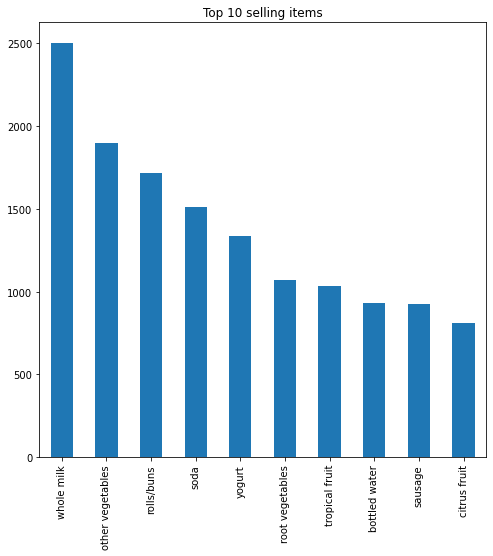

In [0]:
plt.figure(figsize = (8,8))
df.itemDescription.value_counts().head(10).plot.bar()
plt.title('Top 10 selling items')

Out[8]: Text(0.5, 1.0, 'Top 10 least selling items')

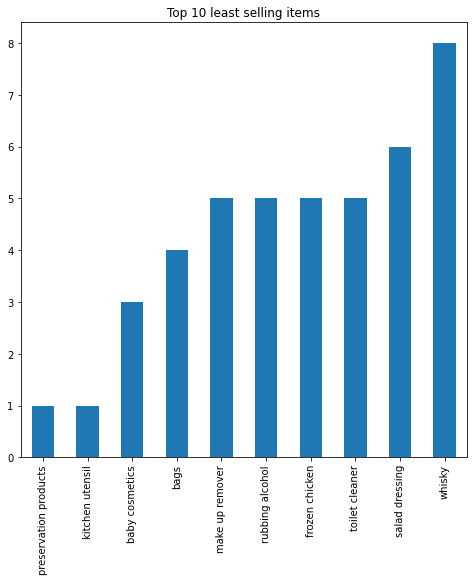

In [0]:
plt.figure(figsize = (8,8))
df.itemDescription.value_counts().tail(10).sort_values().plot.bar()
plt.title('Top 10 least selling items')

In [0]:
df.groupby(['year'])['month'].value_counts()

Out[9]: year  month
2014  5        1625
      7        1623
      10       1555
      2        1547
      8        1535
      6        1525
      12       1520
      4        1506
      1        1504
      11       1496
      3        1491
      9        1350
2015  8        1963
      1        1829
      3        1792
      6        1791
      11       1777
      5        1710
      4        1666
      10       1663
      7        1645
      9        1613
      12       1554
      2        1485
Name: month, dtype: int64

In [0]:
df[df.year == 2015]['month'].value_counts().sort_index()

Out[10]: Series([], Name: month, dtype: int64)

In [0]:
data = df.copy()
data1 = df.copy()
data = pd.get_dummies(data['itemDescription'])
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
data1.drop(['itemDescription'], axis = 1, inplace = True)
data1 = data1.join(data)
data1.head()

,Member_number,Date,year,month,day,day_of_week,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,2015-07-21,2015,7,21,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,2015-05-01,2015,5,1,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,2015-09-19,2015,9,19,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,2015-12-12,2015,12,12,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,2015-01-02,2015,1,2,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
products = df['itemDescription'].unique()
products

Out[13]: array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (

In [0]:
data2 = data1.groupby(['Member_number', 'Date'])[products[:]].sum()
data2

tropical fruit 
 whole milk 
 pip fruit 
 other vegetables 
 rolls/buns 
 pot plants 
 citrus fruit 
 beef 
 frankfurter 
 chicken 
 ... 
 flower (seeds) 
 rice 
 tea 
 salad dressing 
 specialty vegetables 
 pudding powder 
 ready soups 
 make up remover 
 toilet cleaner 
 preservation products 
 
 
 Member_number 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1000 
 2014-06-24 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-03-15 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-05-27 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-07-24 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-11-25 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 4999 
 2015-05-16 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-12-26 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 5000 
 2014-09-03 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2014-11-16 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-10-02 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 
 14963 rows × 167 columns

In [0]:
def funct(data):
  for i in products:
    if data[i] > 0:
      data[i] = i

  return data 


In [0]:
data2 = data2.apply(funct, axis = 1)
data2.head()

tropical fruit 
 whole milk 
 pip fruit 
 other vegetables 
 rolls/buns 
 pot plants 
 citrus fruit 
 beef 
 frankfurter 
 chicken 
 ... 
 flower (seeds) 
 rice 
 tea 
 salad dressing 
 specialty vegetables 
 pudding powder 
 ready soups 
 make up remover 
 toilet cleaner 
 preservation products 
 
 
 Member_number 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1000 
 2014-06-24 
 0 
 whole milk 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-03-15 
 0 
 whole milk 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-05-27 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-07-24 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-11-25 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 
 5 rows × 167 columns

In [0]:
newdata = data2.values

In [0]:
newdata.ndim

newdata = [i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]

In [0]:
newdata[:10]

Out[32]: [['whole milk', 'pastry', 'salty snack'],
 ['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

In [0]:
association = apriori(newdata, min_support = 0.0003, min_confidence = 0.05, max_length = 3, min_lift = 3)
result = list(association)

In [0]:
result

Out[34]: [RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'pickled vegetables', 'ham'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]),
 RelationRecord(items=frozenset({'roll products ', 'meat'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'roll products '}), items_add=frozenset({'meat'}), confidence=0.06097560975609757, lift=3.620547812620984)]),
 RelationRecord(items=frozenset({'salt', 'misc. beverages'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'misc

In [0]:
result[1]

Out[35]: RelationRecord(items=frozenset({'pickled vegetables', 'ham'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)])

In [0]:
type(result[1])

Out[36]: apyori.RelationRecord